# Exploration of the .skeleton files provided in the NTU-RGB-D dataset

The aim of this notebook is to extract the 3D coordinates of the .skeleton files and play them back. The sample names follow the notation SsssCcccPpppRrrrAaaa with :

S : setup number 

C : camera id

P : performer id

R : replication number

A : action label

In [1]:
%matplotlib notebook
import numpy as np
import os
import random
import sys

from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from play_skeleton import *
from src.utils.joints import *
from src.data.read_NTU_RGB_D_skeleton import *

# Global variables (change depending on your setup)
project_dir = os.getcwd() + '/../'
raw_data = project_dir + "data/raw/"
skeleton_folder = raw_data + "nturgb+d_skeletons/"


## 1. Choose a random sample

In [2]:
sample_name = os.path.splitext(random.choice(os.listdir(skeleton_folder)))[0]
# sample_name= "S001C002P001R001A011"
sample_name = "S002C002P007R002A017"
print("Chosen sample name : " + str(sample_name))

Chosen sample name : S002C002P007R002A017


## 2. Extract skeleton coordinates

read_xyz(...) returns a (3, max_frame, num_joint=25, 2) numpy array

read_color_xy(...) returns (2, max_frame, num_joint=25, 2) numpy array

In [3]:
skeleton = read_xyz(skeleton_folder + sample_name + ".skeleton") # shape (3, 103, 25, 2)

print("===== 3D skeleton =====")
print(skeleton[:, 0, :, 0])
print(skeleton.transpose(3, 2, 0, 1)[0].shape)

has_2_subjects = np.any(skeleton[:, :, :, 1])
print("Number of subjects : " + str(int(has_2_subjects) * 2))

===== 3D skeleton =====
[[-0.004 -0.036 -0.066 -0.066 -0.216 -0.28  -0.216 -0.186  0.109  0.182
   0.173  0.153 -0.068 -0.105 -0.054 -0.031  0.059  0.198  0.187  0.206
  -0.058 -0.166 -0.144  0.176  0.197]
 [-0.631 -0.365 -0.104  0.025 -0.2   -0.412 -0.54  -0.57  -0.188 -0.412
  -0.516 -0.563 -0.628 -0.651 -1.014 -1.062 -0.618 -0.647 -0.997 -1.046
  -0.169 -0.61  -0.55  -0.593 -0.553]
 [ 2.931  2.921  2.896  2.87   2.865  2.827  2.684  2.633  2.929  2.932
   2.751  2.672  2.883  2.516  2.581  2.453  2.908  2.584  2.661  2.532
   2.905  2.554  2.626  2.596  2.651]]
(25, 3, 120)
Number of subjects : 0


## 3. Playback skeleton animation (first subject only)

<IPython.core.display.Javascript object>


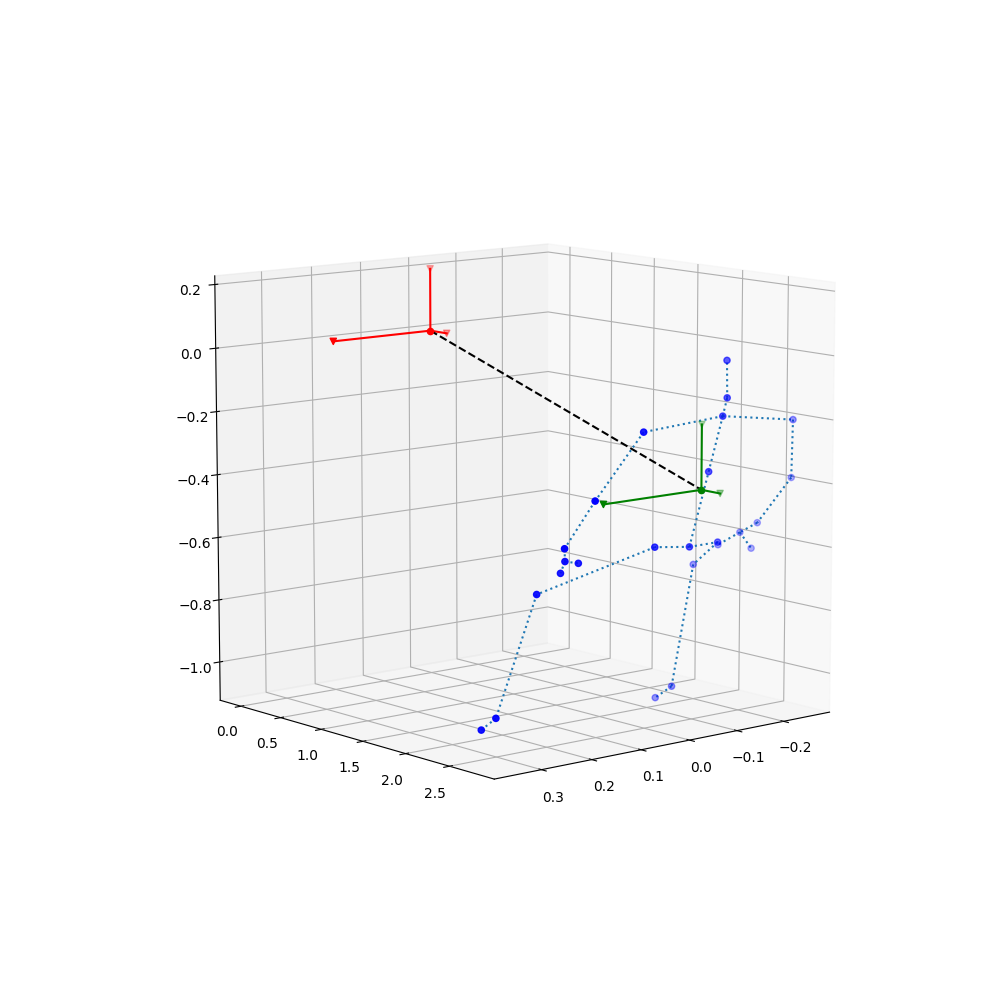

In [4]:
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)